Bir makine öğrenmesi metodu tahminde bulunmak için çıktır üretir.

    * Bu çıktı kategorik ise sınıflandırma
    * Nümerik ise regesyon denir.
    * Kümeleme(clustering) ise benzer gözlemleri aynı kümelere atma işlemidr

Aslında bu bir sınıflandırma (classficiton) modelidir.

Sonucu belirleyen bir  veya daha fazla bağımsız değişken bulunan bir veri kümesini analiz etmek için kullanılan bir yöntemdir.

Sonuç ikili değişkenle ölçülür. Yani bağımlı değişkenin alabileceği sadece 2 değer vardır,bu nedenle binary classifiction olarak kategorilendirilir

Sadece iki seçenekten birinin seçilmesi gerek tahminlerde kullanılır. Örneğin;
 -Hastalık belirtisi var mı yok mu?
 -email spam mı değil mi?

#### Logistic regression verileri sadece 2 sınıfa ayırabilir. Mesela 5 farklı grup arasında prediction yapmak istiyorsak Logistic Regression kullanamayoz, KNN kullanabiliriz. Ama sadece 2 grup arasında tahmin yapacaksak Logistic Regression bazı durumlarda KNN'e göre çok daha yüksek doğrulukta sonuç verir

y değeri 0 veya 1 değerlerinden biri olacağı için grafikte plotumuz parabolik bir yapıda olucak bu tarz bir problemi çözmek için sigmoid(logit) fonksiyonu kullanılır

sigmoid(z)=1/1+é^-z

yani eğer olasılık 0.5ten büyükse sonuç 1: sigorta yaptıracak
yani eğer olasılık 0.5ten küçükse sonuç 0: sigorta yaptırmayacak demektir

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dataset={
    "Yaş":[21,24,45,46,51,55,54,59,61,60,17,27,26,50,28],
    "Sigorta":[0,0,1,1,0,1,0,1,1,1,0,0,0,1,0] # var,yok
}
df=pd.DataFrame(dataset)
df

,Yaş,Sigorta
0,21,0
1,24,0
2,45,1
3,46,1
4,51,0
5,55,1
6,54,0
7,59,1
8,61,1
9,60,1


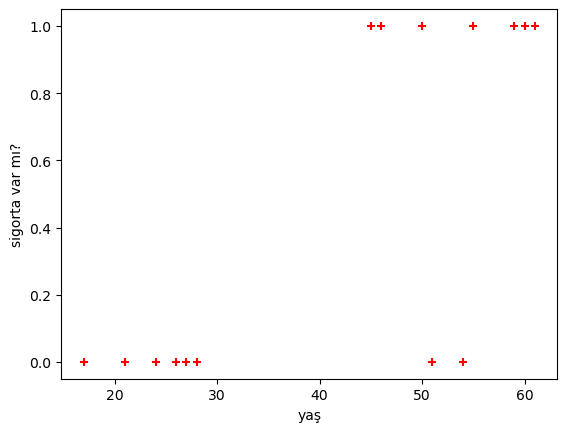

In [9]:
# verileri ekrana çizdirelim
plt.xlabel("yaş")
plt.ylabel("sigorta var mı?")
plt.scatter(df["Yaş"],df.Sigorta,color="red",marker="+")

In [10]:
#train ve test verilerimizi oluşturalım %80 train %20 test yapıyoruz
x_train,x_test,y_train,y_test=train_test_split(df[["Yaş"]],df.Sigorta,test_size=0.2)

In [11]:
x_train # bakalım x_traine neyleri koymuş

,Yaş
14,28
5,55
4,51
9,60
8,61
7,59
11,27
10,17
6,54
12,26


In [12]:
x_test #bakalım x_teste neyleri koymuş

,Yaş
3,46
1,24
0,21


In [13]:
y_train #y_traine neyleri koymuş

14    0
5     1
4     0
9     1
8     1
7     1
11    0
10    0
6     0
12    0
2     1
13    1
Name: Sigorta, dtype: int64

In [14]:
#modelimizi oluşturalım
model=LogisticRegression() 
model.fit(x_train,y_train) # fit ile eğitimi gerçekleştirdik

LogisticRegression()

In [17]:
x_test

,Yaş
3,46
1,24
0,21


In [18]:
# model eğitimi tamamlandı artık tahmin yapabiliriz
#x_test veri listemiz için model bize bir tahmin arrayi oluştursun.(içinde sonuçlar olacak tabiki bu arrayin)
y_predicted=model.predict(x_test)
y_predicted

array([0, 0, 0], dtype=int64)

In [19]:
#tahmine göre 46,24,21 yaşlarındaki bireyler sigorta yaptırmayacak

In [21]:
#modelimiz bize ayrıca her bir test verisi için hesapladığı olasılık sonucunu da 2 boyutlu bir array olarak döndürür
#ilk sonuç 0 için, ikinci sonuç 1 için olasılık
model.predict_proba(x_test)
# 0 değerleri hep 0.5ten küçük olduğu için sigorta yaptırcak mı 0 döndü

array([[0.55068073, 0.44931927],
       [0.97942907, 0.02057093],
       [0.98740943, 0.01259057]])

In [25]:
# yaşı 33 ve 70 olan iki kişinin sigorta yaptırıp yaptırmayacağını bulalım
lst=[33,70]
new_df=pd.DataFrame(lst)
model.predict(new_df)

C:\Users\90541\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int64)